### HRV data preprocessing for FL research

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from PIL import Image

In [3]:
# HRV 데이터셋 불러오기
hrv_df = pd.read_csv('E:/RESEARCH/Datasets/HRV_samsung/HRV_REV_all.csv', sep=',')
hrv_df.head()

,sub,VISIT,disorder,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,E001,4,2,23,1,2,2,1,12,22,...,41.544667,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000
1,E001,5,2,23,1,12,7,0,12,24,...,39.825333,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333
2,E002,1,2,38,1,14,17,14,31,122,...,20.052000,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000
3,E002,2,2,38,1,13,36,16,32,139,...,20.201667,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000
4,E002,3,2,38,1,7,10,11,23,70,...,74.788000,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000


In [14]:
hrv_df.shape

(479, 93)

In [15]:
# hrv_df['null1'] = 0
# hrv_df['null2'] = 0
# hrv_df['null3'] = 0
# hrv_df['null4'] = 0
# hrv_df['null5'] = 0
# hrv_df['null6'] = 0
# hrv_df['null7'] = 0
# hrv_df['null8'] = 0
# hrv_df['null9'] = 0
# hrv_df['null10'] = 0
# hrv_df['null11'] = 0
# hrv_df['null12'] = 0
# hrv_df['null13'] = 0

In [6]:
hrv_df.shape

(479, 93)

In [16]:
#hrv data확인
hrv_df.head()

,sub,VISIT,disorder,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,E001,4,2,23,1,2,2,1,12,22,...,41.544667,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000
1,E001,5,2,23,1,12,7,0,12,24,...,39.825333,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333
2,E002,1,2,38,1,14,17,14,31,122,...,20.052000,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000
3,E002,2,2,38,1,13,36,16,32,139,...,20.201667,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000
4,E002,3,2,38,1,7,10,11,23,70,...,74.788000,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000


In [13]:
# ## HRV 데이터셋에서 VISIT1, 즉 첫번째 방문에 대한 데이터만을 hrv_visit1에 저장
# hrv_visit1=hrv_df[hrv_df['VISIT']==5]
# hrv_visit1.shape

(93, 93)

In [68]:
#disorder값은 pixel에 넣지 않음. 
hrv_100 = hrv_df.drop(['sub','disorder','VISIT'], axis=1)
hrv_100.head()

,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,PSWQ,SPI,PSS,...,sRMSSD,sVLF,sLF,sHF,sLF/HF,sPOWER,sHR,sRESP,sSC,sTEMP
0,23,1,2,2,1,12,22,33,15,10,...,45.486667,102.912000,379.289333,130.104000,2.930333,612.305000,65.484667,13.136667,5.669333,33.682333
1,23,1,12,7,0,12,24,37,18,14,...,70.836667,475.476000,1345.689667,1390.014000,1.986000,3211.179667,72.857333,13.948667,10.076000,35.009667
2,38,1,14,17,14,31,122,39,0,21,...,16.828000,54.895000,118.118000,69.418333,1.567000,242.431333,95.091000,14.785333,1.126000,35.187667
3,38,1,13,36,16,32,139,35,0,26,...,12.420000,33.789333,40.496000,22.918000,1.888333,97.203000,90.964667,13.989667,0.652000,36.226667
4,38,1,7,10,11,23,70,32,0,16,...,44.142667,27.772333,280.004333,244.097667,1.523000,551.874000,89.312000,13.814000,0.535000,35.963000


In [69]:
# 우리가 만들 분석모델의 target인 y는 disorder
y = hrv_df.loc[:,['disorder']]
y.head()

,disorder
0,2
1,2
2,2
3,2
4,2


In [70]:
# 환자만 따로 뽑으면
patient = hrv_df.loc[:, ['sub']]
patient.head

<bound method NDFrame.head of       sub
0    E001
1    E001
2    E002
3    E002
4    E002
..    ...
475  E107
476  E108
477  E108
478  E108
479  E108

[480 rows x 1 columns]>

##### 이제 총 100개의 column으로 구성되었으니까 normalization 하자 (0~1 사이 값으로 범위변환)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hrv_100[:] = scaler.fit_transform(hrv_100[:])

##### 만약에 평균0, 표준편차 1의 표준정규분포를 따르도록 변환하려면 아래와 같이 실행 (근데 이건 gender나 age변수에 대해서는 안좋음)

In [72]:
# from sklearn.preprocessing import StandardScaler
# stscaler = StandardScaler()
# hrv_100[:] = stscaler.fit_transform(hrv_100[:])

In [73]:
#normalize 제대로 되어 있는지 확인
hrv_100.head()

,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,PSWQ,SPI,PSS,...,sRMSSD,sVLF,sLF,sHF,sLF/HF,sPOWER,sHR,sRESP,sSC,sTEMP
0,0.068966,0.0,0.06250,0.054054,0.038462,0.176471,0.105769,0.362637,0.087719,0.098039,...,0.050443,0.002134,0.003175,0.002404,0.139438,0.003380,0.169497,0.468542,0.324185,0.752054
1,0.068966,0.0,0.37500,0.189189,0.000000,0.176471,0.115385,0.406593,0.105263,0.137255,...,0.080992,0.010057,0.011351,0.025903,0.092394,0.017908,0.270710,0.576330,0.578093,0.872753
2,0.327586,0.0,0.43750,0.459459,0.538462,0.455882,0.586538,0.428571,0.000000,0.205882,...,0.015907,0.001113,0.000966,0.001273,0.071521,0.001312,0.575937,0.687392,0.062402,0.888939
3,0.327586,0.0,0.40625,0.972973,0.615385,0.470588,0.668269,0.384615,0.000000,0.254902,...,0.010595,0.000664,0.000309,0.000405,0.087529,0.000500,0.519290,0.581772,0.035090,0.983420
4,0.327586,0.0,0.21875,0.270270,0.423077,0.338235,0.336538,0.351648,0.000000,0.156863,...,0.048823,0.000536,0.002335,0.004531,0.069329,0.003042,0.496602,0.558454,0.028349,0.959443


##### 여기서부터는 hrv_100 데이터를 쓰도록 하자.
- sub, disorder, visit 변수를 제거하였음(90 rows가 되었음)
- 10 x 10 형태를 맞춰주기 위해서 null1~null10 rows 추가
- 각 row별로 normalize해서 0~1사이로 값을 맞춰주었음

In [74]:
hrv_100.shape

(480, 25)

In [75]:
#값이 어떻게 표기되는지 x0를 통해서 확인해보자
x0=hrv_100.loc[479].values

In [76]:
x0

array([1.37931034e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.91176471e-01, 8.22115385e-01, 5.71428571e-01,
       7.01754386e-01, 1.96078431e-01, 7.88732394e-01, 4.46428571e-01,
       4.86074083e-02, 1.59999952e-01, 1.72848867e-01, 3.65651488e-02,
       2.05490295e-03, 9.08065509e-04, 2.81334100e-03, 3.62337658e-02,
       1.98344361e-03, 4.38234285e-01, 8.40441772e-01, 8.96940422e-03,
       6.63117214e-01])

In [77]:
# 10 x 10으로 reshape
x0=x0.reshape(5,5)

In [78]:
# heatmap으로 체크해봄. 근데 heatmap보다 그냥 plt.imsho()써서 gray scale로 보는게 가독성 있을듯
# x0 = sns.heatmap(x0)

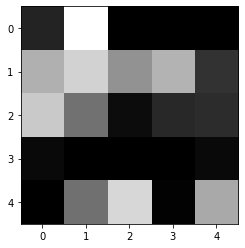

In [79]:
#gray scale로 확인해보고
plt.imshow(x0, cmap='gray')

In [80]:
hrv_100.loc[0] #확인했으니까 이제 우리 데이터를 가지고

age       0.068966
gender    0.000000
HAMD      0.062500
HAMA      0.054054
PDSS      0.038462
ASI       0.176471
APPQ      0.105769
PSWQ      0.362637
SPI       0.087719
PSS       0.098039
BIS       0.633803
SSI       0.017857
sSDNN     0.081098
sNN50     0.232000
sPNN50    0.326410
sRMSSD    0.050443
sVLF      0.002134
sLF       0.003175
sHF       0.002404
sLF/HF    0.139438
sPOWER    0.003380
sHR       0.169497
sRESP     0.468542
sSC       0.324185
sTEMP     0.752054
Name: 0, dtype: float64

In [81]:
hrv_100.shape

(480, 25)

In [82]:
hrv_100_arr = hrv_100.values
hrv_100_arr.shape

(480, 25)

In [83]:
# array 형태로 479개 행에 대해서 10 x 10 reshape
hrv_array = hrv_100_arr.reshape(480,5,5)

In [84]:
hrv_array.shape

(480, 5, 5)

In [85]:
# data = pd.concat([hrv_100,hrv_target], axis=1)

In [86]:
np.save('E:/RESEARCH/Datasets/HRV_samsung/stress/y.npy', y)

In [87]:
np.save('E:/RESEARCH/Datasets/HRV_samsung/stress/x.npy', hrv_array)

In [88]:
np.save('E:/RESEARCH/Datasets/HRV_samsung/stress/patient.npy', patient)

In [89]:
xdata = np.load('E:/RESEARCH/Datasets/HRV_samsung/stress/x.npy')

In [90]:
xdata

array([[[6.89655172e-02, 0.00000000e+00, 6.25000000e-02, 5.40540541e-02,
         3.84615385e-02],
        [1.76470588e-01, 1.05769231e-01, 3.62637363e-01, 8.77192982e-02,
         9.80392157e-02],
        [6.33802817e-01, 1.78571429e-02, 8.10983949e-02, 2.31999814e-01,
         3.26409738e-01],
        [5.04428727e-02, 2.13408362e-03, 3.17540086e-03, 2.40447750e-03,
         1.39438493e-01],
        [3.38000089e-03, 1.69496955e-01, 4.68541897e-01, 3.24184689e-01,
         7.52053590e-01]],

       [[6.89655172e-02, 0.00000000e+00, 3.75000000e-01, 1.89189189e-01,
         0.00000000e+00],
        [1.76470588e-01, 1.15384615e-01, 4.06593407e-01, 1.05263158e-01,
         1.37254902e-01],
        [6.05633803e-01, 3.57142857e-02, 1.05671782e-01, 2.39999808e-01,
         3.10089250e-01],
        [8.09917890e-02, 1.00571272e-02, 1.13508185e-02, 2.59028448e-02,
         9.23943999e-02],
        [1.79084869e-02, 2.70710066e-01, 5.76329984e-01, 5.78093190e-01,
         8.72753175e-01]],

      